#### AUTISM PREDICTION IN CHILDREN
- Dataset: https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++
- Write a full research paper with detailed description
- Download the dataset from the given link. Study the dataset clearly. 
- We have to build the classifier for prediction of autism in children
- Import Data
- Clean the data with removing missing values and outlier detection
- Identify important features use wrapper / filters method
- Use different graphs to understand the data
- Use encoding or scaling if necessary
- Check the accuracy of different algorithms
- Apply hyperparameter tuning for parameter decision
- Find the suitable ensemble learning algorithm for this data
- Write a full research paper with detailed description

Autism spectrum disorder (ASD) is a neurological and developmental disorder that affects how people interact with others, communicate, learn, and behave. Although autism can be diagnosed at any age, it is described as a “developmental disorder” because symptoms generally appear in the first 2 years of life.

### Import

In [2045]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [2046]:
import warnings
warnings.filterwarnings('ignore')

### Converting arff to csv

In [2047]:
data = arff.loadarff('Autism-Child-Data.arff')
train = pd.DataFrame(data[0])

In [2048]:
catCols = [col for col in train.columns if train[col].dtype=="O"]
catCols[:]

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'age_desc',
 'relation',
 'Class/ASD']

In [2049]:
train[catCols]=train[catCols].apply(lambda x: x.str.decode('utf8'))
train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10.0,4-11 years,Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4.0,4-11 years,Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7.0,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,no,India,no,9.0,4-11 years,Parent,YES


In [2050]:
train.to_csv('Autism-Child-Data.csv',index=False)

### Importing CSV

In [2051]:
data = pd.read_csv('Autism-Child-Data.csv')

### Data preprocessing

In [2052]:
data.columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'family_mem_with_ASD', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD']

In [2053]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_mem_with_ASD,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


In [2054]:
a = data[(data['age']<5) & (data['result']>7)]['age'].count()
print(f"According to the data {a} children(of age < 5) have a result > 7")

According to the data 29 children(of age < 5) have a result > 7


In [2055]:
b = data[(data['age']<7) & (data['result']>7)]['age'].value_counts()
print(f"The age and corresponding number of children who have age<7 and result>7 are :\n{b}")

The age and corresponding number of children who have age<7 and result>7 are :
age
4.0    29
5.0    14
6.0    13
Name: count, dtype: int64


In [2056]:
data.shape

(292, 21)

In [2057]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
287    False
288    False
289    False
290    False
291    False
Length: 292, dtype: bool

In [2058]:
data.drop_duplicates(inplace=True)

In [2059]:
data.shape

(290, 21)

In [2060]:
data = data.dropna()

In [2061]:
data.shape

(286, 21)

In [2062]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.639860,0.538462,0.741259,0.552448,0.748252,0.709790,0.604895,0.493007,0.493007,0.727273,6.367133,6.248252
std,0.480882,0.499392,0.438711,0.498113,0.434778,0.454655,0.489730,0.500827,0.500827,0.446142,2.368248,2.284482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [2063]:
data['age'].median()

6.0

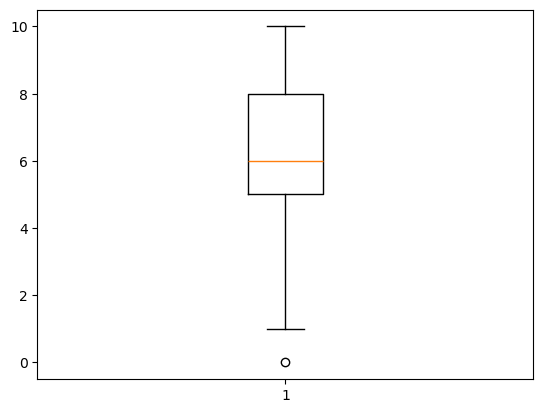

In [2064]:
plt.boxplot(data['result'],showfliers=True);

In [2065]:
Q1 = np.percentile(data['result'], 25)
Q3 = np.percentile(data['result'], 75)

#in pandas as follows
# q1 = data['result'].quantile(0.25)
# q3 = data['result'].quantile(0.75)

In [2066]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['result'] < lower_bound) | (data['result'] > upper_bound)]
outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_mem_with_ASD,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
137,0,0,0,0,0,0,0,0,0,0,...,f,Hispanic,no,no,United States,no,0.0,4-11 years,Parent,NO


In [2067]:
data = data.drop(137)#deleting the outlier

In [2068]:
data['relation'] = data['relation'].str.upper()
data['gender'] = data['gender'].str.upper()
data['ethnicity'] = data['ethnicity'].str.upper()
data['jaundice'] = data['jaundice'].str.upper()
data['family_mem_with_ASD'] = data['family_mem_with_ASD'].str.upper()
data['country_of_res'] = data['country_of_res'].str.upper()
data['used_app_before'] = data['used_app_before'].str.upper()
data['Class/ASD'] = data['Class/ASD'].str.upper()

In [2069]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_mem_with_ASD,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,M,OTHERS,NO,NO,JORDAN,NO,5.0,4-11 years,PARENT,NO
1,1,1,0,0,1,1,0,1,0,0,...,M,MIDDLE EASTERN,NO,NO,JORDAN,NO,5.0,4-11 years,PARENT,NO
2,1,1,0,0,0,1,1,1,0,0,...,M,?,NO,NO,JORDAN,YES,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,F,?,YES,NO,JORDAN,NO,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,M,OTHERS,YES,NO,UNITED STATES,NO,10.0,4-11 years,PARENT,YES


In [2070]:
col = data.columns
# colors = ['r','b','y','pink','g','teal','maroon','lime','k','navy']

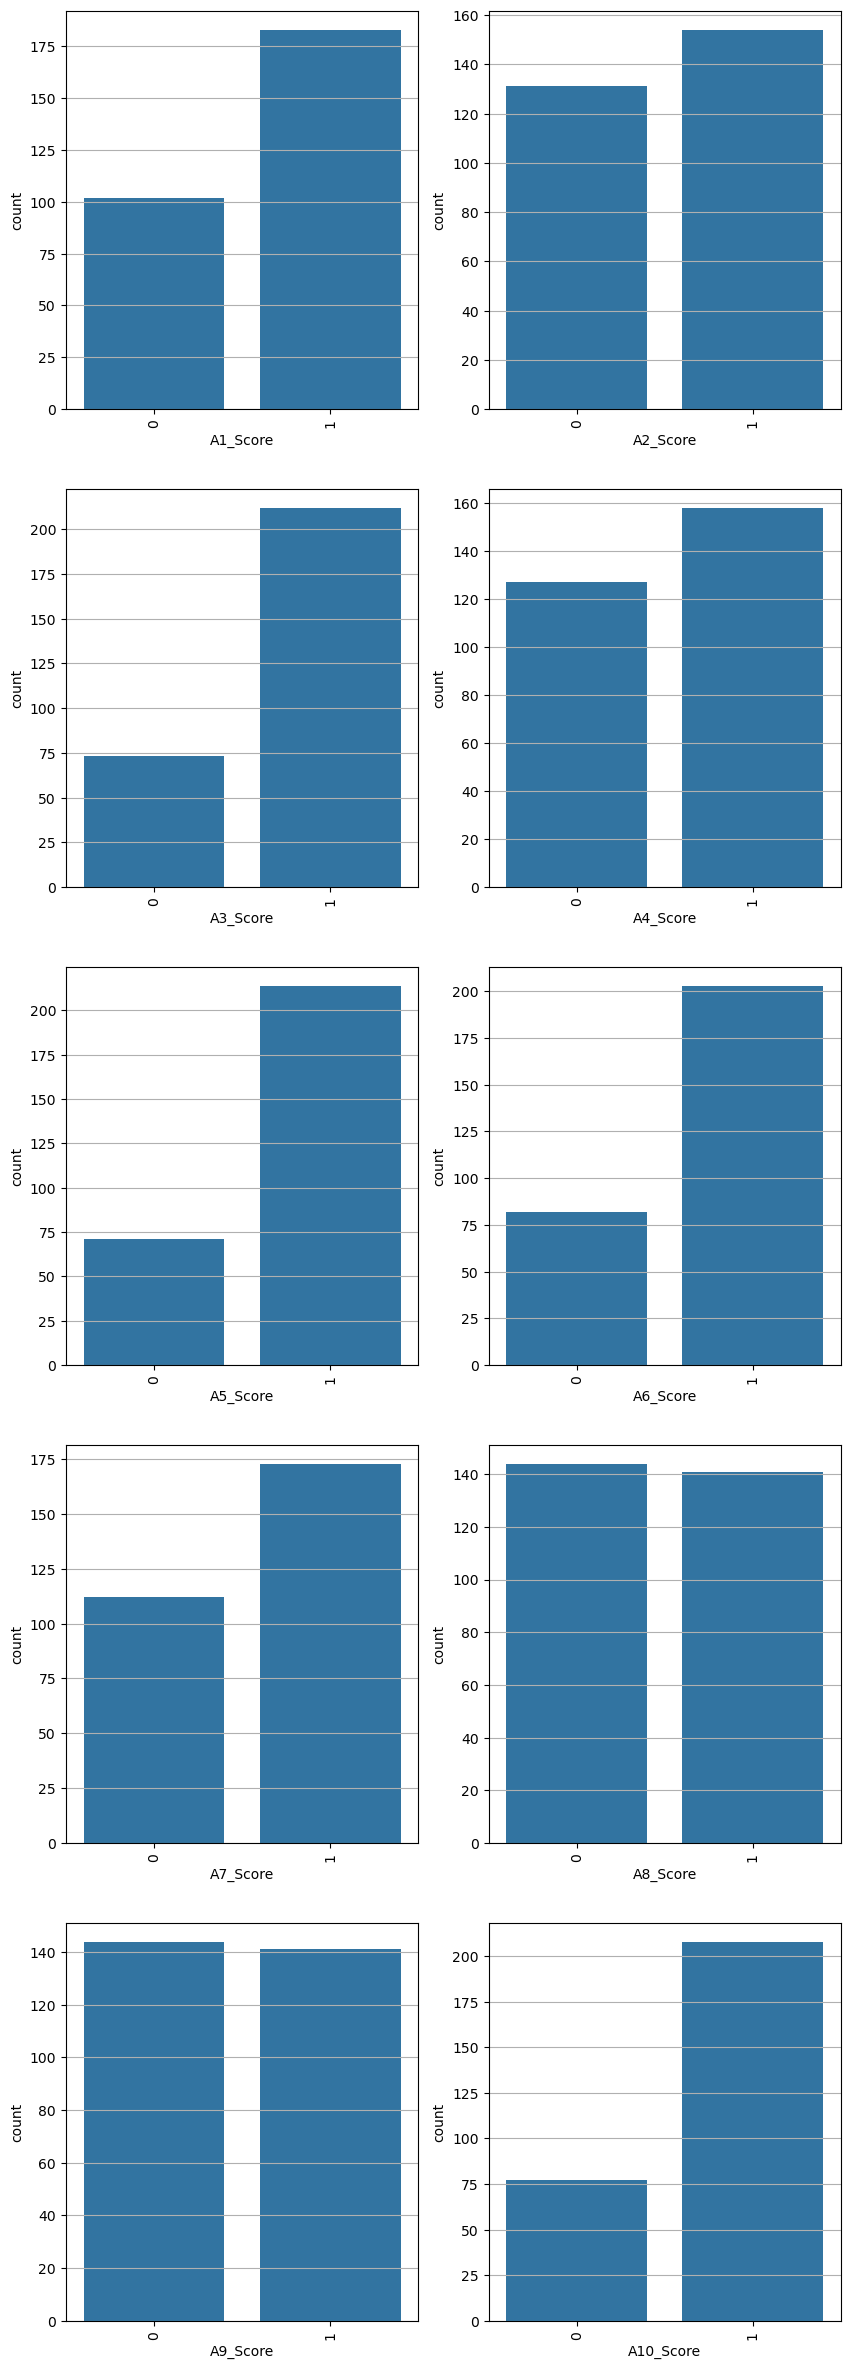

In [2071]:
plt.figure(figsize=[10,30])
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.grid()
    sns.countplot(x=data[col[i]])
    plt.xticks(rotation=90)
#Following shows the respective scores of the 10 questions asked to each individual

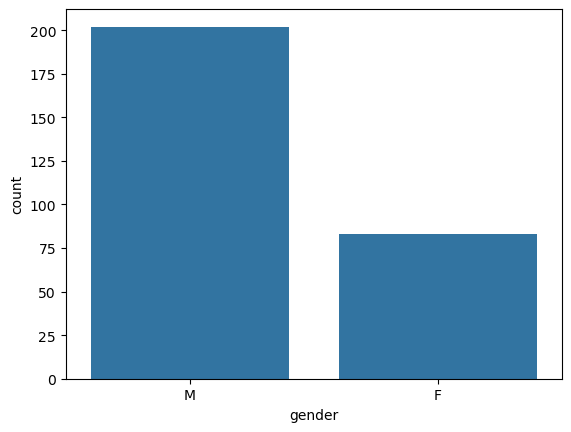

In [2072]:
sns.countplot(x=data['gender']);#shows the number of male and female candidates screened

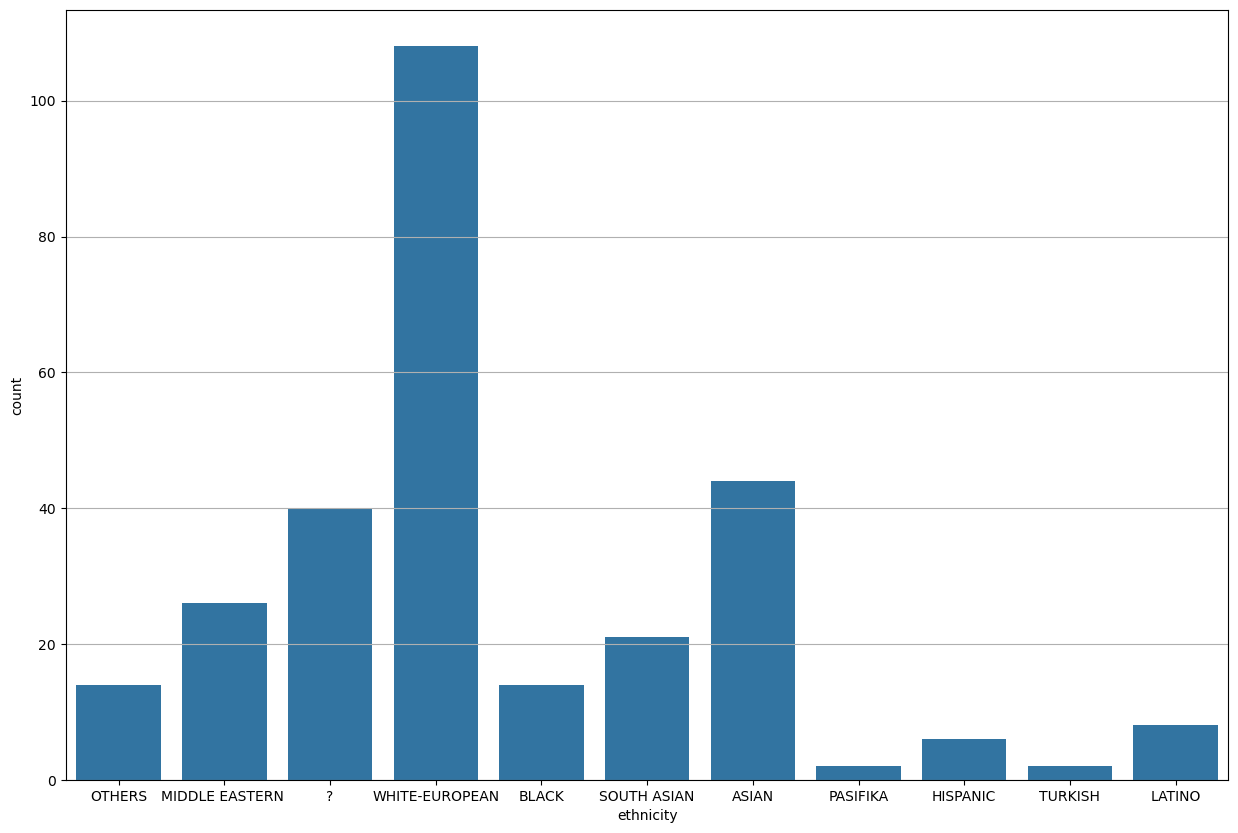

In [2073]:
plt.figure(figsize=[15,10])
plt.grid()
sns.countplot(x=data['ethnicity']);
#it shows that the maximum children screened belonged to the white-european ethnicity(more than 100 out of 285)

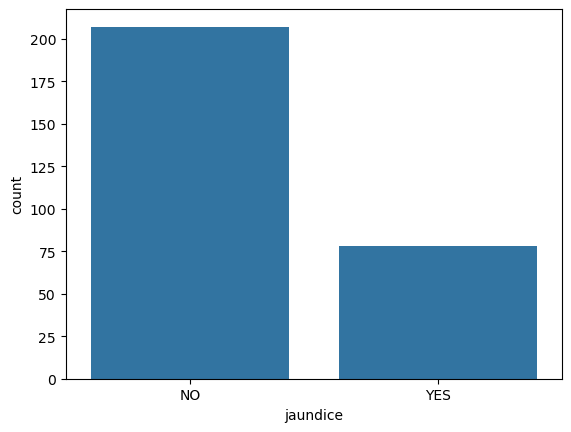

In [2074]:
sns.countplot(x=data['jaundice']);#more than 200 children out of 285 dont have jaundice

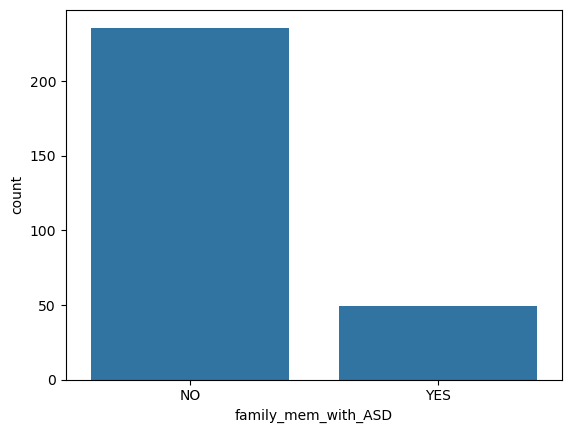

In [2075]:
sns.countplot(x=data['family_mem_with_ASD']);#more than 200 children out of 285 dont have autism

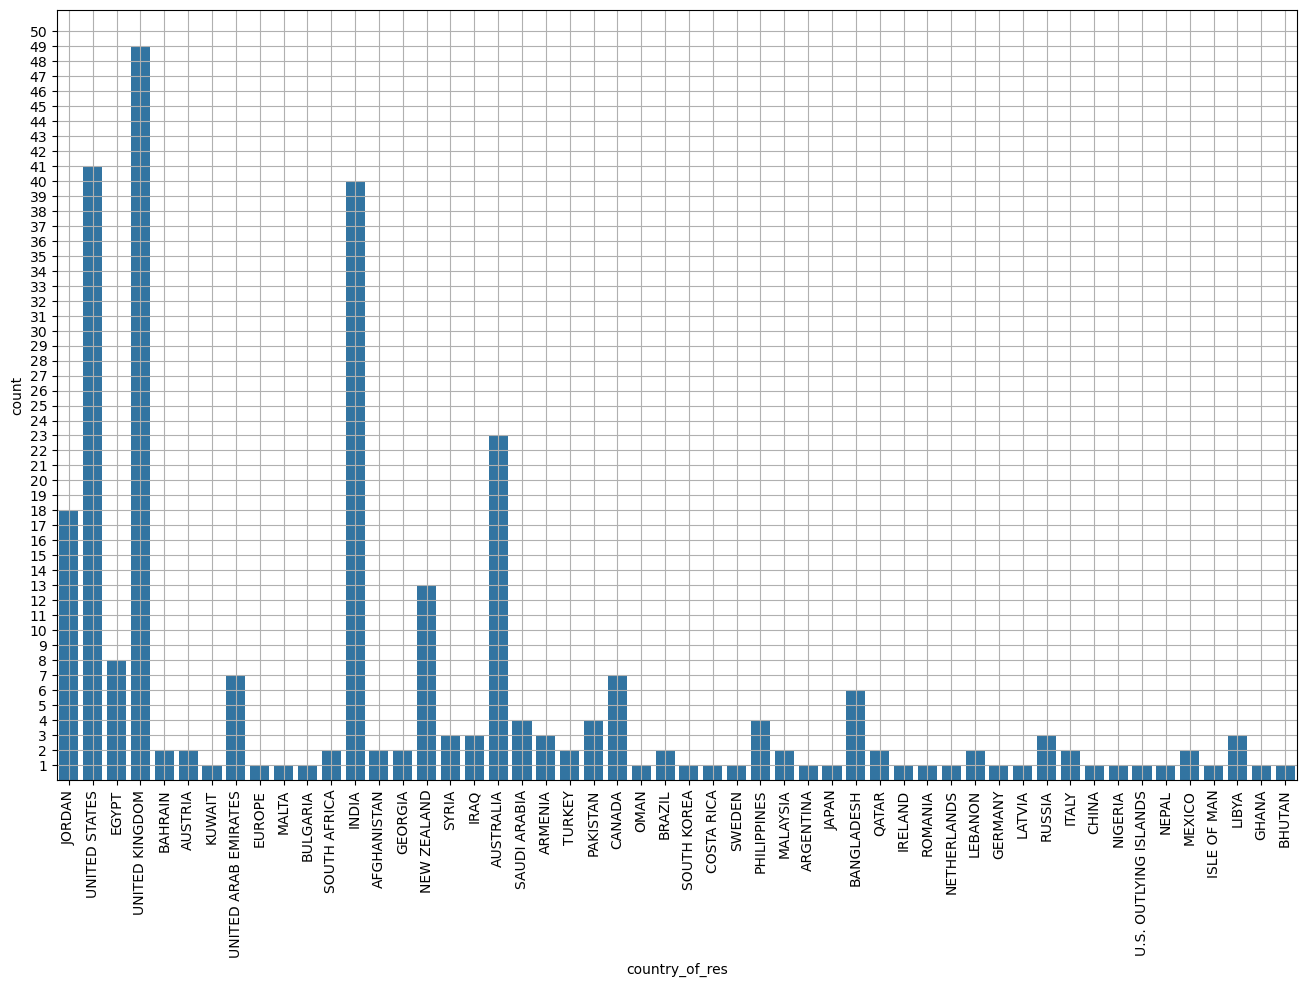

In [2076]:
plt.figure(figsize=[16,10])
sns.countplot(x=data['country_of_res'])
plt.grid()
plt.xticks(rotation=90)
plt.yticks(ticks=range(1,51));
#it shows that the most of the children screened where from United Kingdom

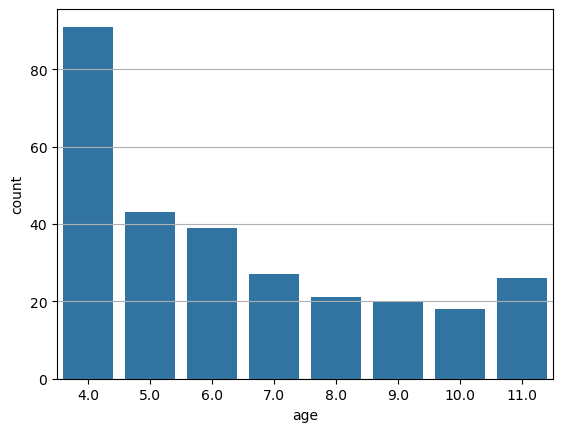

In [2077]:
plt.grid()
sns.countplot(x=data['age']);#maximum children are of 4 years(>80)

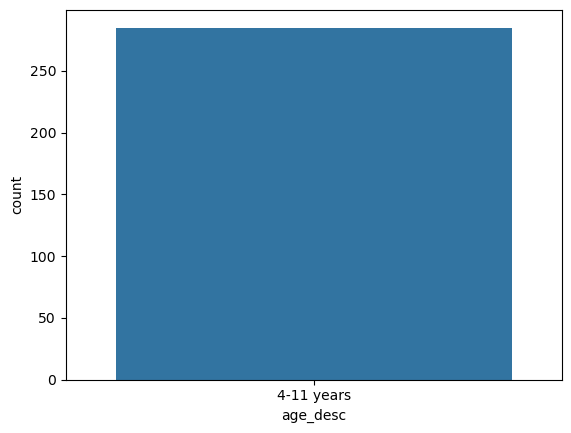

In [2078]:
sns.countplot(x=data['age_desc']);
#all the children(285) screened are in the age group of 4-11 years old

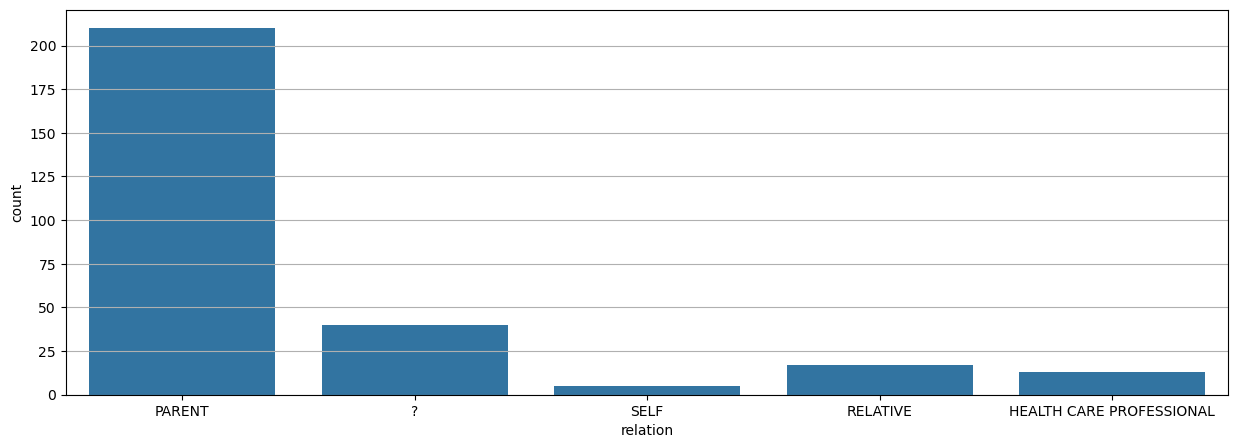

In [2079]:
plt.figure(figsize=[15,5])
plt.grid()
sns.countplot(x=data['relation']);

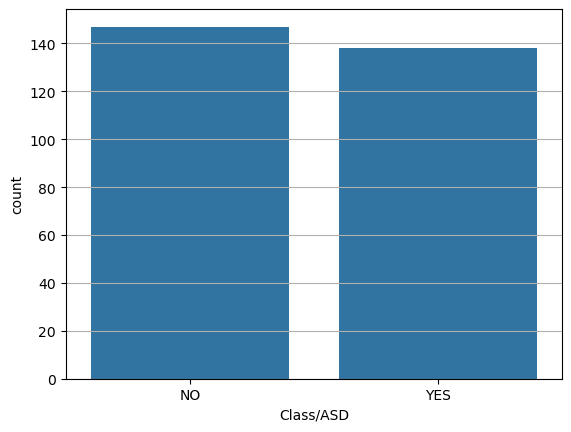

In [2080]:
plt.grid()
sns.countplot(x=data['Class/ASD']);#more than 140 of them have ASD traits

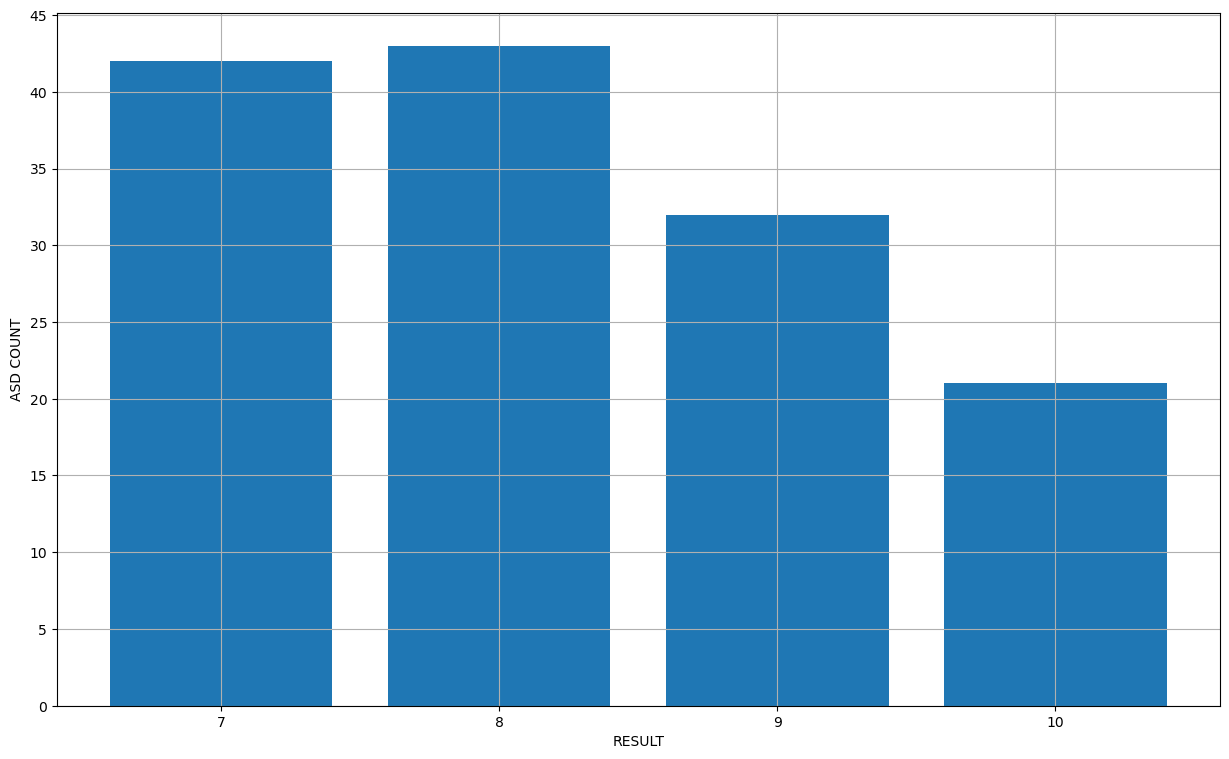

In [2081]:
asd_counts = data[data['Class/ASD']=='YES'].groupby('result').size()
plt.figure(figsize=[15,9])
plt.grid()
plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('RESULT')
plt.ylabel('ASD COUNT')
plt.xticks(ticks=range(7,11,1))
plt.yticks(ticks=range(0,46,5));
#it shows the number of children who have a ASD and have score --> (7,8,9,10)

### Encoding

In [2082]:
data_encoded = data.drop(['gender','ethnicity','jaundice','country_of_res','age_desc','relation'],axis=1).copy()

In [2083]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_encoded['gender_encoded'] = encoder.fit_transform(data['gender'])
data_encoded['ethnicity_encoded'] = encoder.fit_transform(data['ethnicity'])
data_encoded['jaundice_encoded'] = encoder.fit_transform(data['jaundice'])
data_encoded['country_of_res_encoded'] = encoder.fit_transform(data['country_of_res'])
data_encoded['age_desc_encoded'] = encoder.fit_transform(data['age_desc'])
data_encoded['relation_encoded'] = encoder.fit_transform(data['relation'])
 

In [2084]:
data_encoded.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,family_mem_with_ASD,used_app_before,result,Class/ASD,gender_encoded,ethnicity_encoded,jaundice_encoded,country_of_res_encoded,age_desc_encoded,relation_encoded
0,1,1,0,0,1,1,0,1,0,0,...,NO,NO,5.0,NO,1,6,0,24,0,2
1,1,1,0,0,1,1,0,1,0,0,...,NO,NO,5.0,NO,1,5,0,24,0,2
2,1,1,0,0,0,1,1,1,0,0,...,NO,YES,5.0,NO,1,0,0,24,0,0
3,0,1,0,0,1,1,0,0,0,1,...,NO,NO,4.0,NO,0,0,1,24,0,0
4,1,1,1,1,1,1,1,1,1,1,...,NO,NO,10.0,YES,1,6,1,51,0,2


### Split the Data

In [2085]:
x = data_encoded.drop(['family_mem_with_ASD','used_app_before','Class/ASD','age'],axis=1).copy()
y = data['Class/ASD'].copy()

In [2086]:
# NORMALIZATION / STANDARDIZATION / FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

### Cross Validation

In [2087]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2088]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0)

### Logistic Regression

In [2089]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

logr = LogisticRegression(random_state=0,C=1)
logr.fit(x_train,y_train)

LogisticRegression(C=1, random_state=0)

In [2090]:
y_pred = logr.predict(x_test)
a_logr = accuracy_score(y_test,y_pred)
a_logr

1.0

In [2091]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        29
         YES       1.00      1.00      1.00        43

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



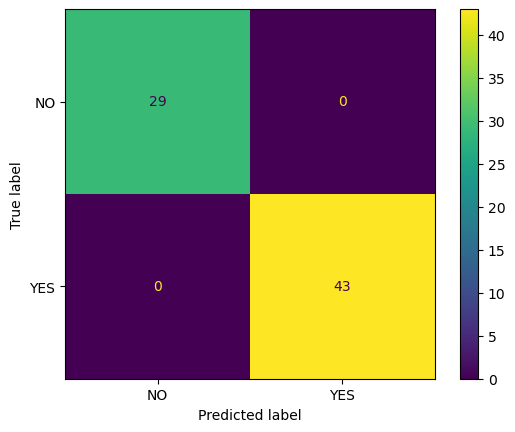

In [2092]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### Decision Tree Classifier

In [2093]:
from sklearn.tree import DecisionTreeClassifier

t = DecisionTreeClassifier(random_state=0,max_depth=10)
t.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [2094]:
y_pred = t.predict(x_test)
a_t = accuracy_score(y_test,y_pred)
a_t

1.0

In [2095]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        29
         YES       1.00      1.00      1.00        43

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



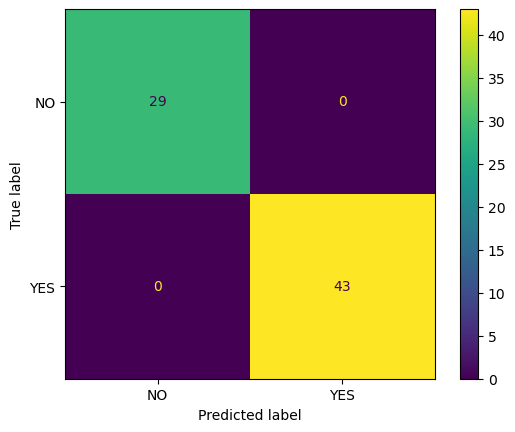

In [2096]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### Random Forest Classifier

In [2097]:
from sklearn.ensemble import RandomForestClassifier

In [2098]:
rfc = RandomForestClassifier(random_state=0, n_estimators=10)

In [2099]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [2100]:
y_pred = rfc.predict(x_test)

In [2101]:
a_rf = accuracy_score(y_test, y_pred)
a_rf

0.9861111111111112

In [2102]:
#Hyperparameter Tuning
params = {
    'random_state' : range(0,10),
    'n_estimators' : range(5,21),
    'max_depth' : range(1,6),
    'max_features' : ['auto','sqrt','log2']
}

In [2103]:
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy',cv=5)#cv-->cross validation in 5 different ways

In [2104]:
grid.fit(x_scaled,y);

In [2105]:
grid.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=5, random_state=2)

In [2106]:
y_pred = grid.predict(x_test)

In [2107]:
a_rf_h = accuracy_score(y_test,y_pred)
a_rf_h

1.0

In [2108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        29
         YES       1.00      1.00      1.00        43

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



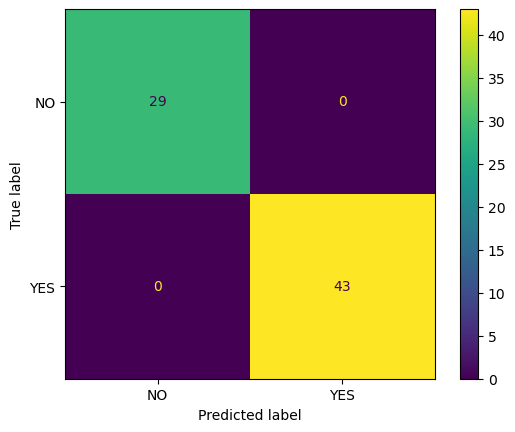

In [2109]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

### Gradient Boosting Classifier

In [2110]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [2111]:
y_pred = gbc.predict(x_test) 
a_gbc = accuracy_score(y_test,y_pred)
a_gbc

1.0

In [2112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        29
         YES       1.00      1.00      1.00        43

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



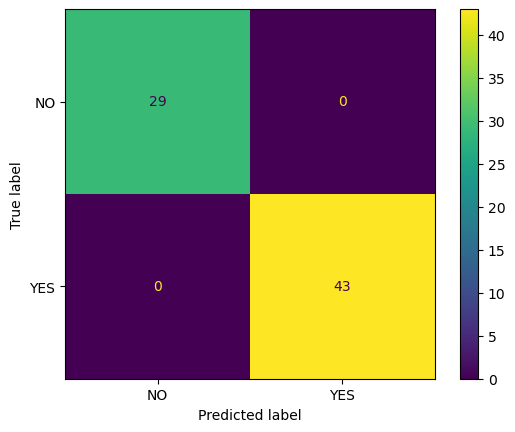

In [2113]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### K Neighbours Classifier

In [2114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [2115]:
y_pred = knn.predict(x_test)
a_knn = accuracy_score(y_test,y_pred)
a_knn

0.9305555555555556

In [2116]:
#HYPERPARAMETER TUNING
params = {
    'n_neighbors' : range(1,21),
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute']
}

In [2117]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,scoring='accuracy',cv=5)#cv-->cross validation in 5 different ways

In [2118]:
grid.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [2119]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [2120]:
y_pred = grid.predict(x_test)
a_knn_h = accuracy_score(y_test,y_pred)
a_knn_h

0.9444444444444444

In [2121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.93      0.93      0.93        29
         YES       0.95      0.95      0.95        43

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72



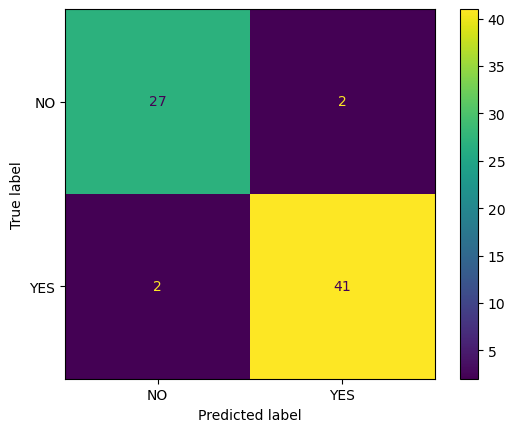

In [2122]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test);

### SVM Classifier

In [2123]:
from sklearn.svm import SVC

svc = SVC(random_state=0,C=1)

In [2124]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
a_svc = accuracy_score(y_test,y_pred)
a_svc

0.9444444444444444

In [2135]:
params = {
    'random_state' : range(0,11),
    'C' : np.arange(0.01,10),
    'gamma' : np.arange(0.001,1)
}

In [2136]:
grid = GridSearchCV(estimator=SVC(),param_grid=params,scoring='accuracy',cv=5)#cv-->cross validation in 5 different ways

In [2137]:
grid.fit(x_scaled,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                         'gamma': array([0.001]),
                         'random_state': range(0, 11)},
             scoring='accuracy')

In [2138]:
grid.best_estimator_

SVC(C=9.01, gamma=0.001, random_state=0)

In [2139]:
y_pred = grid.predict(x_test)

In [2140]:
a_svc_h = accuracy_score(y_test,y_pred)
a_svc_h

1.0

In [2141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        29
         YES       1.00      1.00      1.00        43

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



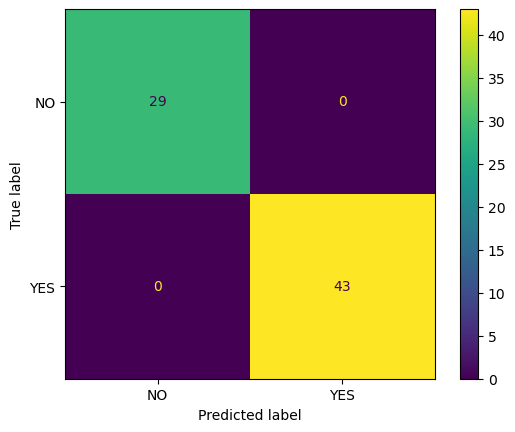

In [2142]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

### Conclusion

In [2148]:
conclusion = {
    'Classifier' : ['Logistic Regression','Decision Tree','RandomForest','Gradient Boosting','KNeighbors','SVM'],
    'Accuracy Score' : [a_logr,a_t,a_rf,a_gbc,a_knn,a_svc],
    'After Hyperparameter tuning' : ['-','-',a_rf_h,'-',a_knn_h,a_svc_h]
}
Conclusion = pd.DataFrame(conclusion)

In [2149]:
Conclusion

,Classifier,Accuracy Score,After Hyperparameter tuning
0,Logistic Regression,1.000000,-
1,Decision Tree,1.000000,-
2,RandomForest,0.986111,1.0
3,Gradient Boosting,1.000000,-
4,KNeighbors,0.930556,0.944444
5,SVM,0.944444,1.0
